<a href="https://colab.research.google.com/github/pulungnola/Pulungnolab_pemogramanpython/blob/main/Tugas_Python_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Pulung Nola Boangmanalu**
# **Nim  : 1101184520**

# **1. Menghitung Daya Terima**

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [88]:
f=1800 #MHz
loc='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m 
Ptx= 30000 #milliwatt
Gtx= 10 #db
Grx= 2 #db
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [89]:
NtL = lambda x : 10*np.log10(x) #numerik(watt) ke logaritmik(dB)
LtN = lambda x : 10**(x/10) #logaritmik(dB) ke numerik(watt)

In [90]:
Ptx_convert= NtL(Ptx) #mengubah daya pengirim ke bentuk logaritmik (dB)

In [91]:
def Prx(ptx,PL,gain_tr,gain_rv):
    Ptx_convert= NtL(ptx) 
    prx = Ptx_convert - (PL + gain_tr + gain_rv)
    Prx_convert= LtN(prx) #mengubah daya terima ke bentuk numerik (milliWatt)

    return Prx_convert # milliwatt

# **Grafik 1- Kurva Frekuensi 1800 MHz**

In [92]:
LpUrban=cos(f,loc,tower,user,d)
LpSubUrban=cos(f,loc2,tower,user,d)
LpOpen=cos(f,loc3,tower,user,d)

In [93]:
#nilai Prx setiap kawasan dalam milliwatt
Prx_Urban=Prx(Ptx_convert,LpUrban,Gtx,Grx )
Prx_SubUrban=Prx(Ptx_convert,LpSubUrban,Gtx,Grx)
Prx_Open=Prx(Ptx_convert,LpOpen,Gtx,Grx)

In [94]:
d_sort=d[np.argsort(d)]
Urban_sort=Prx_Urban[np.argsort(d)]
SubUrban_sort=Prx_SubUrban[np.argsort(d)]
Open_sort=Prx_Open[np.argsort(d)]

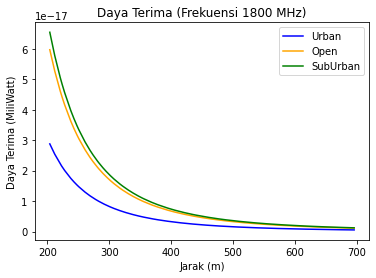

In [96]:
plt.figure()
plt.plot(d_sort,Urban_sort,'b-', label='Urban')
plt.plot(d_sort,Open_sort,'orange', label='Open')
plt.plot(d_sort,SubUrban_sort,'g-', label='SubUrban')
plt.legend()
plt.title('Daya Terima (Frekuensi 1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (MiliWatt)')
plt.show()

# **Grafik 2 - Model Urban**

In [98]:
f=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'


# **Model Urban Prx**

In [99]:
LpUrban=cos(f,loc,tower,user,d)
LpUrban2=cos(f2,loc,tower,user,d)
LpUrban3=cos(f3,loc,tower,user,d)

In [100]:
Prx_Urban=Prx(Ptx_convert,LpUrban,Gtx,Grx )
Prx_Urban2=Prx(Ptx_convert,LpUrban2,Gtx,Grx)
Prx_Urban3=Prx(Ptx_convert,LpUrban3,Gtx,Grx)

In [101]:
d_sort=d[np.argsort(d)]
Urban_sort=Prx_Urban[np.argsort(d)]
Urban2_sort=Prx_Urban2[np.argsort(d)]
Urban3_sort=Prx_Urban3[np.argsort(d)]

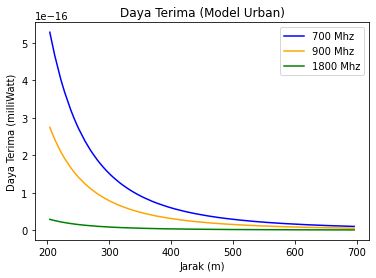

In [102]:
plt.figure()
plt.plot(d_sort,Urban_sort,'b-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'orange', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Daya Terima (Model Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (milliWatt)')
plt.show()

# **2. Menghitung SNR**

In [107]:
BW= 5000000 #Hz

In [108]:
def snr(Prx, BW):
  noise=-174 + NtL(BW)
  Noise=LtN(noise)
  SNR=Prx/Noise
  return SNR

In [109]:
SNR_Urban=snr(Prx_Urban,BW)
SNR_SubUrban=snr(Prx_SubUrban,BW)
SNR_Open=snr(Prx_Open,BW)

In [110]:
d_sort=d[np.argsort(d)]
snrUrban_sort=SNR_Urban[np.argsort(d)]
snrSubUrban_sort=SNR_SubUrban[np.argsort(d)]
snrOpen_sort=SNR_Open[np.argsort(d)]

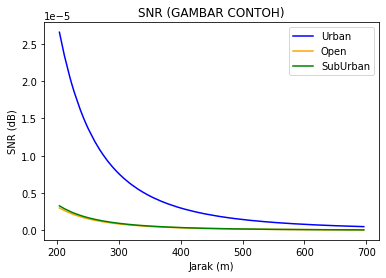

In [111]:
plt.figure()
plt.plot(d_sort,snrUrban_sort,'b-', label='Urban')
plt.plot(d_sort,snrOpen_sort,'orange', label='Open')
plt.plot(d_sort,snrSubUrban_sort,'g-', label='SubUrban')
plt.legend()
plt.title('SNR (GAMBAR CONTOH)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()


# **Grafik 2 Frekuensi 1800 Mhz**

In [112]:
SNR_Urban=snr(Prx_Urban,BW)
SNR_Urban2=snr(Prx_Urban2,BW)
SNR_Urban3=snr(Prx_Urban3,BW)

In [113]:
d_sort=d[np.argsort(d)]
snrUrban_sort=SNR_Urban[np.argsort(d)]
snrUrban2_sort=SNR_Urban2[np.argsort(d)]
snrUrban3_sort=SNR_Urban3[np.argsort(d)]

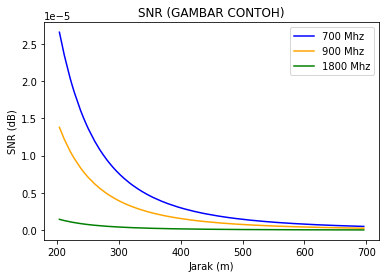

In [114]:
plt.figure()
plt.plot(d_sort,snrUrban_sort,'b-',label='700 Mhz')
plt.plot(d_sort,snrUrban2_sort,'orange',label='900 Mhz')
plt.plot(d_sort,snrUrban3_sort,'g-',label='1800 Mhz')
plt.legend()
plt.title('SNR (GAMBAR CONTOH)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

# **3. Menghitung Capacity**

In [115]:
def C(Snr,Bw):
    capacity= Bw*np.log2(1+Snr)
    return capacity

In [116]:
C_Urban=C(SNR_Urban,BW)
C_Open=C(SNR_Open,BW)
C_SubUrban=C(SNR_SubUrban,BW)

# **Grafik Frekuensi 1800 MHz**

In [117]:
d_sort=d[np.argsort(d)]
UrbanC_sort=C_Urban[np.argsort(d)]
OpenC_sort=C_Open[np.argsort(d)]
SubUrbanC_sort=C_SubUrban[np.argsort(d)]

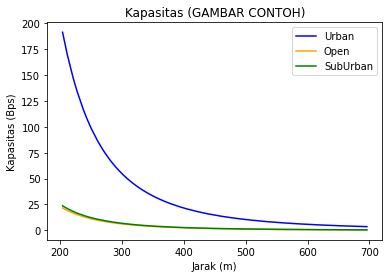

In [118]:
plt.figure()
plt.plot(d_sort,UrbanC_sort,'b-', label='Urban')
plt.plot(d_sort,OpenC_sort,'orange', label='Open')
plt.plot(d_sort,SubUrbanC_sort,'g-', label='SubUrban')
plt.legend()
plt.title('Kapasitas (GAMBAR CONTOH)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (Bps)')
plt.show()


# **GRAFIK 2 Model Urban**

In [119]:
C_Urban=C(SNR_Urban,BW)
C_Urban2=C(SNR_Urban2,BW)
C_Urban3=C(SNR_Urban3,BW)

In [120]:
d_sort=d[np.argsort(d)]
UrbanC_sort=C_Urban[np.argsort(d)]
UrbanC2_sort=C_Urban2[np.argsort(d)]
UrbanC3_sort=C_Urban3[np.argsort(d)]

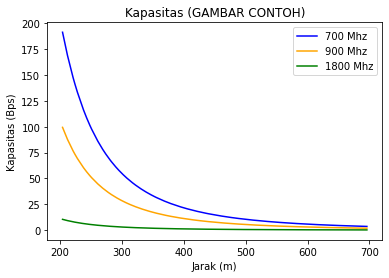

In [122]:
plt.figure()
plt.plot(d_sort,UrbanC_sort,'b-', label='700 Mhz')
plt.plot(d_sort,UrbanC2_sort,'orange', label='900 Mhz')
plt.plot(d_sort,UrbanC3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Kapasitas (GAMBAR CONTOH)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (Bps)')
plt.show()